In [1]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package'

In [3]:
od.download(dataset_url)

NameError: name 'od' is not defined

In [ ]:
import os

In [5]:
data_dir_name = './weather-dataset-rattle-package'

In [4]:
os.listdir(data_dir_name)
data_csv = data_dir_name + '/weatherAUS.csv'
raw_df = pd.read_csv(data_csv)

NameError: name 'os' is not defined

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [ ]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Trainign, Validation, Test set


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df,val_df,test_df =raw_df[year<2015],raw_df[year==2015],raw_df[year > 2015]

# Create inputs and targets

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_cols ='RainTomorrow'

In [ ]:
train_inputs, target_inputs = train_df[input_cols].copy(),train_df[target_cols].copy()
val_inputs,val_targets = val_df[input_cols].copy(),val_df[target_cols].copy()
test_inputs,test_targets = test_df[input_cols].copy(),test_df[target_cols].copy()

# Identify numeric and categorical columns

In [ ]:
numeric_cols =train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Impute missing values

In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,314
MaxTemp,187
Rainfall,0
Evaporation,36331
Sunshine,40046
WindGustSpeed,6828
WindSpeed9am,874
WindSpeed3pm,1069
Humidity9am,1052
Humidity3pm,1116


In [ ]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Scale numeric features

In [ ]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037741,0.526244,0.286822,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.492351,0.499917,0.651899,0.714012
144549,0.556604,0.786389,0.000000,0.037741,0.526244,0.193798,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.492351,0.499917,0.761603,0.771593
144550,0.608491,0.805293,0.000000,0.037741,0.526244,0.255814,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.492351,0.499917,0.778481,0.788868
144551,0.674528,0.818526,0.000000,0.037741,0.526244,0.286822,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.492351,0.499917,0.780591,0.817658


# One-hot encode categorical features

In [ ]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


<ipython-input-22-dc35b20c9603>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-22-dc35b20c9603>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-22-dc35b20c9603>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [ ]:
train_inputs[numeric_cols + encoded_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037741,0.526244,0.286822,0.184615,0.298851,0.22,0.13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,0.556604,0.786389,0.000000,0.037741,0.526244,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,0.608491,0.805293,0.000000,0.037741,0.526244,0.255814,0.200000,0.103448,0.15,0.08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,0.674528,0.818526,0.000000,0.037741,0.526244,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# impute the target

In [ ]:
target_imputer = SimpleImputer(strategy='most_frequent')
target_inputs_imputed = target_imputer.fit_transform(target_inputs.values.reshape(-1, 1))
target_inputs_imputed = pd.Series(target_inputs_imputed.flatten(), index=target_inputs.index)

In [ ]:
target_inputs_imputed.isna().sum()

np.int64(0)

# Model Training and Evaluation

# Select the columns to be used for training/prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model

In [ ]:
model = DecisionTreeClassifier().fit(x_train,target_inputs_imputed)

In [ ]:
train_preds = model.predict(x_train)
train_probs = model.predict_proba(x_train)
accuracy_score(target_inputs_imputed,train_preds)



0.9999795893374699

In [ ]:
test_preds = model.predict(x_test)
test_probs = model.predict_proba(x_test)
accuracy_score(test_targets,test_preds)

0.772539867755737

In [ ]:
model.score(x_test,test_targets)

0.772539867755737

In [ ]:
model.score(x_val,val_targets)

0.7924980981918193

In [ ]:
val_targets.value_counts() / len(val_targets)

NameError: name 'val_targets' is not defined

it appears that the model has learned the training examples perfect,and doesn't generalize well to previously unseen examples.This phenomenon is called **overfitting** and overfitting is one of the most important parts of any machine learning project.

# visualization
We can visualize the decision tree learned from the training data

In [ ]:
from sklearn.tree import plot_tree, export_text

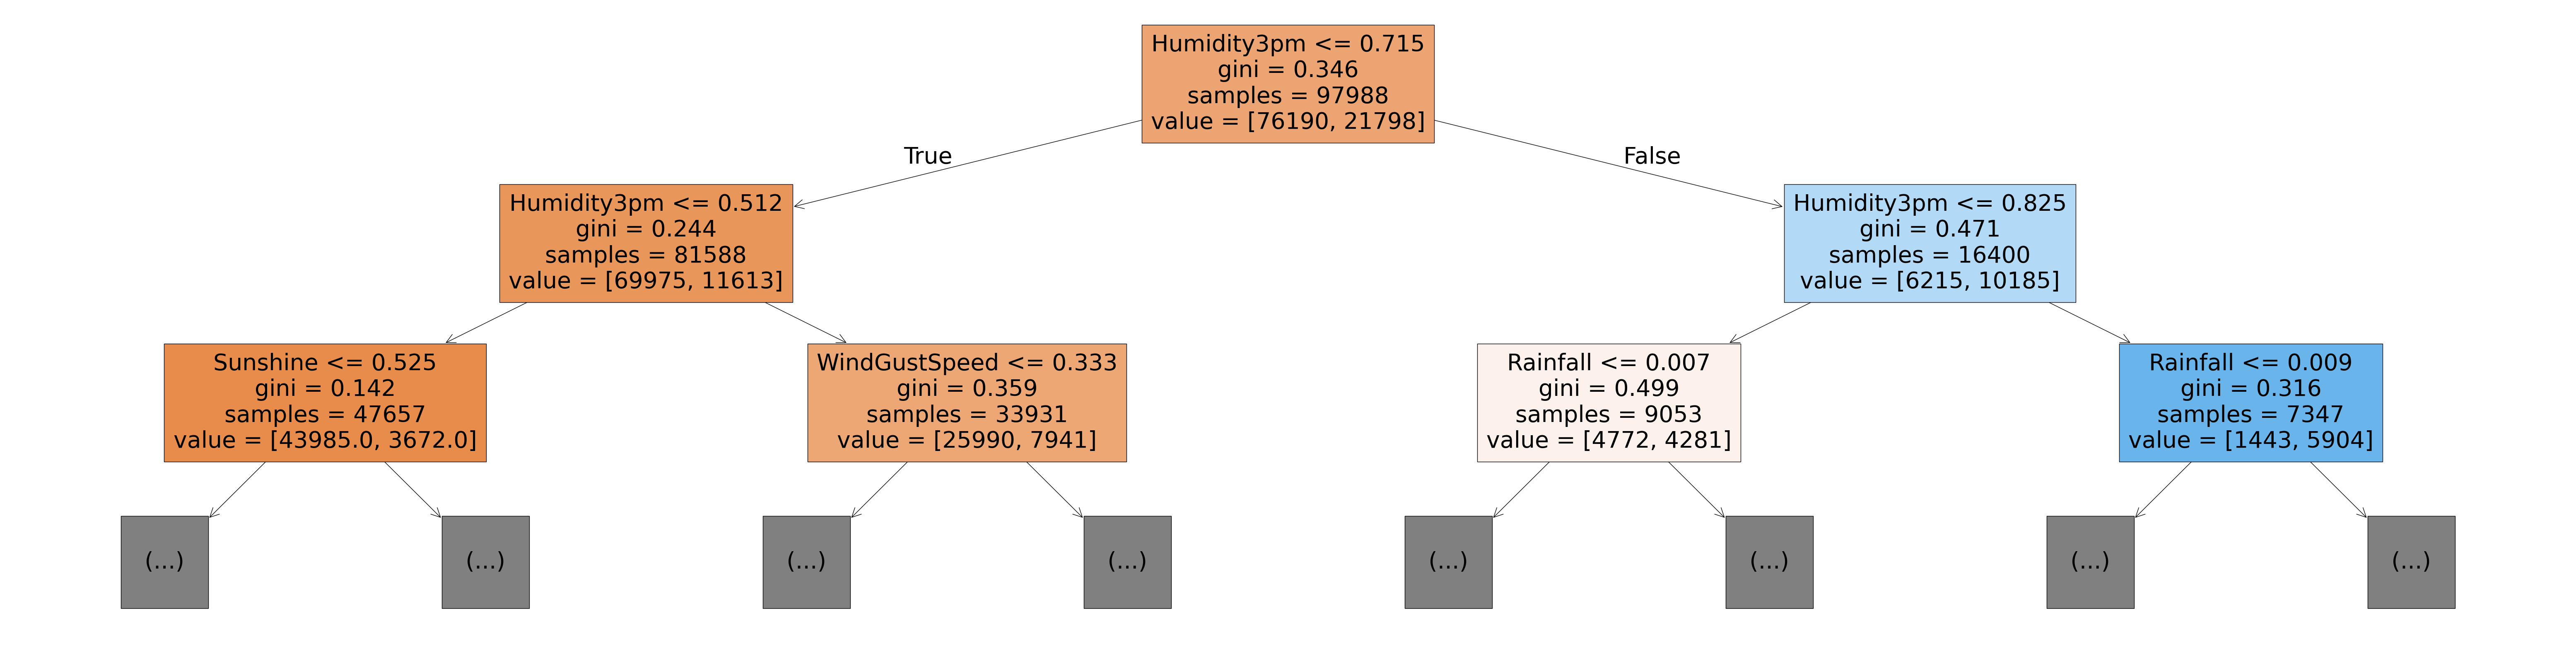

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,max_depth=2,filled=True)
plt.show()

In [ ]:
model.tree_.max_depth

49

In [ ]:
tree_text = export_text(model,max_depth=10,feature_names=list(x_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

# Feature Importance

In [ ]:
x_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [ ]:
model.feature_importances_

array([3.67759527e-02, 2.84488185e-02, 4.37558626e-02, 2.41801392e-02,
       4.82919875e-02, 5.96871833e-02, 2.56050182e-02, 3.02128187e-02,
       3.84602752e-02, 2.79370289e-01, 3.75611130e-02, 6.36570080e-02,
       1.49770552e-02, 1.70553564e-02, 3.53718006e-02, 3.06612023e-02,
       1.67876473e-03, 1.76028422e-03, 1.09537913e-03, 6.14543526e-04,
       1.32862604e-03, 9.89285100e-04, 1.15970669e-03, 1.72116656e-03,
       7.94387115e-04, 1.35848689e-03, 7.97774881e-04, 2.09888865e-03,
       1.53685790e-03, 7.27193053e-04, 7.48096966e-04, 1.48498026e-03,
       6.16690435e-05, 1.45908386e-03, 1.15232705e-03, 1.59658016e-03,
       9.12550829e-04, 9.75566761e-04, 1.28166802e-03, 1.78929888e-03,
       4.08915160e-04, 7.54059286e-04, 1.36103455e-03, 1.56439352e-03,
       1.39100325e-03, 7.57810664e-04, 7.04403280e-04, 1.30542303e-03,
       1.41277930e-03, 1.96496718e-03, 1.01249706e-03, 1.83613073e-03,
       1.33348765e-03, 2.21116373e-03, 9.97853429e-04, 3.29385423e-04,
      

Lets turn this into a dataframe and visualize the most important features.

In [ ]:
importance_df = pd.DataFrame({
    'feature':x_train.columns,
    'importance':model.feature_importances_

}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.279370
11,Pressure3pm,0.063657
5,WindGustSpeed,0.059687
4,Sunshine,0.048292
2,Rainfall,0.043756
8,Humidity9am,0.038460
10,Pressure9am,0.037561
0,MinTemp,0.036776
14,Temp9am,0.035372
15,Temp3pm,0.030661


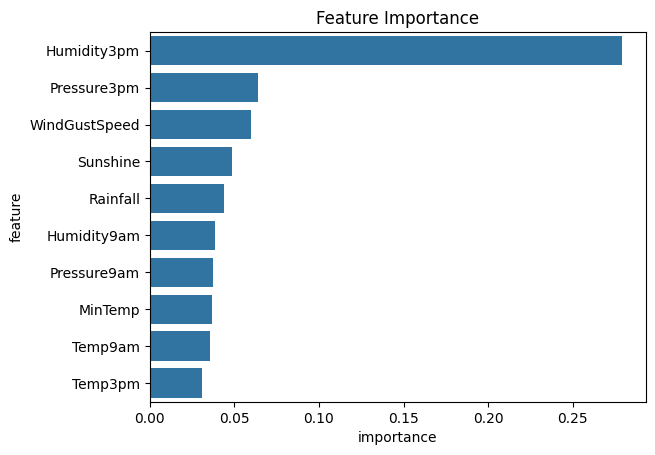

In [ ]:
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')
plt.show()

# hyperparameter Tuning and Overfitting

The process of reducing overfitting is known as regularization.

In [ ]:
?DecisionTreeClassifier

# max_depth

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(x_train,target_inputs_imputed)
model.score(x_train,target_inputs_imputed)

0.8315916234640977

In [ ]:
model.score(x_train,target_inputs_imputed)

0.8315916234640977

In [ ]:
model.score(x_val,val_targets)

0.8348060155655685

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

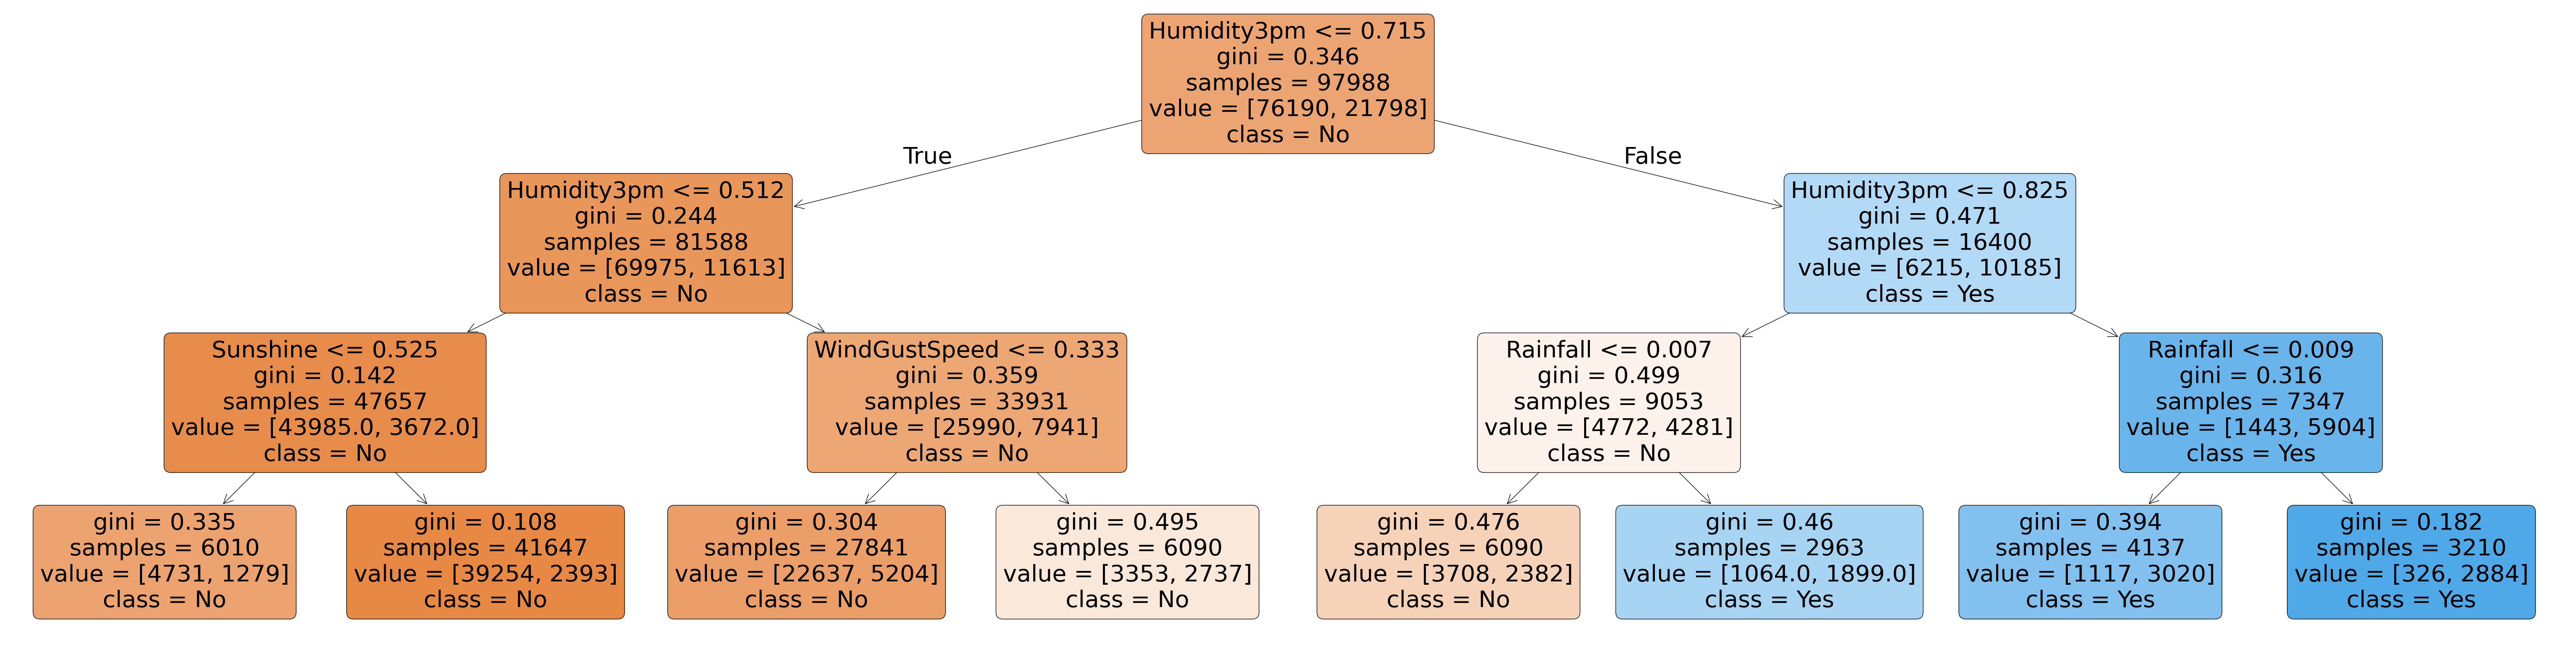

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,filled=True,rounded=True, class_names=model.classes_)
plt.show()

In [ ]:
print(export_text(model,feature_names=list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.53
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Lets experiment with different depths using helper function

In [ ]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(x_train,target_inputs_imputed)
  train_error =1 - model.score(x_train,target_inputs_imputed)
  val_error = 1 - model.score(x_val,val_targets)
  return {'max_depth': md,
          'Training Error':train_error,
          'validation Error':val_error}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [ ]:
errors_df

,max_depth,Training Error,validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


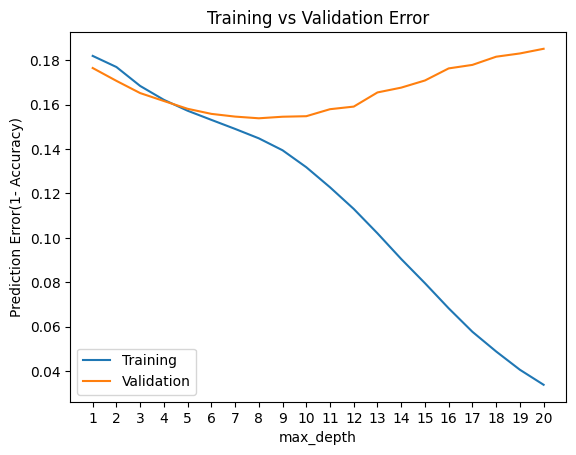

In [ ]:
plt.figure()
plt.plot(errors_df['max_depth'],errors_df['Training Error'],label='Training Error')
plt.plot(errors_df['max_depth'],errors_df['validation Error'],label='Validation Error')
plt.title('Training vs Validation Error')
plt.xticks(range(1,21))
plt.xlabel('max_depth')
plt.ylabel('Prediction Error(1- Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,target_inputs_imputed)
model.score(x_train,target_inputs_imputed),model.score(x_val,val_targets)

(0.8427562558680655, 0.8418865937152554)

In [ ]:
model.tree_.n_leaves # Get the number of leaf nodes

np.int64(32)

# Max_leaf_nodes
Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes.This allows branches of the tree to have varying depths.

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=64,random_state=42)
model.fit(x_train,target_inputs_imputed)
model.score(x_train,target_inputs_imputed),model.score(x_val,val_targets)

(0.847685430869086, 0.8456316929018667)

In [ ]:
model.tree_.max_depth

10

# Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements,a much more effective strategy is to combine the results of several decision trees trained with slightly different prameters.This is called a random forest model.
The key idea here is decision tree in the forest will make diferent kinds of errors,and upon averaging ,many of their errors will cancel out.This idea is also commonly known as the "wisdom of the crowd"

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)

model.fit(x_train,target_inputs_imputed)


In [ ]:
model.score(x_train,target_inputs_imputed),model.score(x_val,val_targets)

In [ ]:
train_probs = model.predict_proba(x_train)
train_probs

we can access individual decision trees using model.estimators_

In [ ]:
model.estimators_[0]

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,feature_names=x_train.columns,filled=True,rounded=True, class_names=model.classes_)
plt.show()

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20],max_depth=2,feature_names=x_train.columns,filled=True,rounded=True, class_names=model.classes_)
plt.show()

In [ ]:
len(model.estimators_)

In [ ]:
importance_df = pd.DataFrame({
    'feature':x_train.columns,
    'importance':model.feature_importances_

}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')
plt.show()

# Hyperparameter Tuning with Random Forest

Just like decision trees,random forest also have several hyperparameters.In fact many of these hyperparameters are applied to the underlying decision trees.

In [ ]:
?RandomForestClassifier

Lets create a base model with which we can compare models with tuned hyperparameters.

In [ ]:
base_model = RandomForestClassifier(n_jobs=-1,random_state=42).fit(x_train,target_inputs_imputed)

In [ ]:
base_train_acc = base_model.score(x_train,target_inputs_imputed)


In [ ]:
base_val_acc = base_model.score(x_val,val_targets)

In [ ]:
base_acc = base_train_acc,base_val_acc
base_acc

We can use this as a benchmark for hypermeter tuning

# n_estimators

This argument controls the number of decision trees in the random forest.The default value is 100.For larger datasets,it helps to have a greater number of estimators.As a general rule,try to have few estimators as need

In [ ]:
model = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=100)

model.fit(x_train,target_inputs_imputed)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,target_inputs_imputed),model.score(x_val,val_targets)

(0.9999693840062048, 0.8567499561121189)

In [ ]:
base_acc

(0.9999693840062048, 0.8567499561121189)

In [ ]:
def n_estimators_error(md):
  model = RandomForestClassifier(n_estimators=md,random_state=42)
  model.fit(x_train,target_inputs_imputed)
  train_error =1 - model.score(x_train,target_inputs_imputed)
  val_error = 1 - model.score(x_val,val_targets)
  return {'n_estimators': md,
          'Training Error':train_error,
          'validation Error':val_error}

In [ ]:
errors_df = pd.DataFrame([n_estimators_error(md) for md in range(1,21)])
errors_df


In [ ]:
plt.figure()
plt.plot(errors_df['n_estimators'],errors_df['Training Error'],label='Training Error')
plt.plot(errors_df['n_estimators'],errors_df['validation Error'],label='Validation Error')
plt.title('Training vs Validation Error')
plt.xticks(range(1,21))
plt.xlabel('n_estimators')
plt.ylabel('Prediction Error(1- Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

# Max_depth and max_leaf_nodes

In [ ]:
def test_param(**param):
  model = RandomForestClassifier(n_jobs=-1,random_state=42,**param)
  model.fit(x_train,target_inputs_imputed)
  return model.score(x_train,target_inputs_imputed),model.score(x_val,val_targets)

In [ ]:
test_param(max_depth=8,max_leaf_nodes=1024,n_estimators=200)

In [ ]:
test_param(max_depth=26)

In [ ]:
test_param(max_leaf_nodes=512)

In [ ]:
base_acc